# Supervised Machine Learning - Classification
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

# Model Building Example

In [ ]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

In [ ]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Load CSV File
data = pd.read_csv(file_name, header=None)
data.columns = ['sepal length', 
                'sepal width',
                'petal length',
                'petal width',
                'class' ]
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal width,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
petal length,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
petal width,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
class,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [ ]:
class_names = data['class'].unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['y_act'] = data['class']
data['y_act'].replace('Iris-setosa', 0, inplace=True)
data['y_act'].replace('Iris-versicolor', 1, inplace=True)
data['y_act'].replace('Iris-virginica', 2, inplace=True)

data.sample(10)

,sepal length,sepal width,petal length,petal width,class,y_act
75,6.6,3.0,4.4,1.4,Iris-versicolor,1
90,5.5,2.6,4.4,1.2,Iris-versicolor,1
74,6.4,2.9,4.3,1.3,Iris-versicolor,1
50,7.0,3.2,4.7,1.4,Iris-versicolor,1
102,7.1,3.0,5.9,2.1,Iris-virginica,2
19,5.1,3.8,1.5,0.3,Iris-setosa,0
139,6.9,3.1,5.4,2.1,Iris-virginica,2
113,5.7,2.5,5.0,2.0,Iris-virginica,2
123,6.3,2.7,4.9,1.8,Iris-virginica,2
111,6.4,2.7,5.3,1.9,Iris-virginica,2


In [ ]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class',
       'y_act'],
      dtype='object')

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


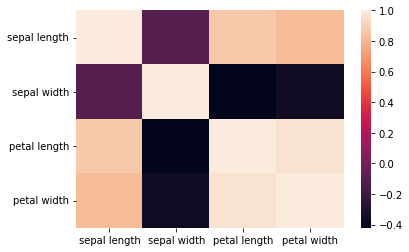

In [ ]:
correlation_matrix = data[['sepal length', 'sepal width', 'petal length', 'petal width', 'class']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

## Identify `X` and `y`

In [ ]:
X_variables = ['sepal length', 'sepal width', 'petal length', 'petal width']
data[X_variables].head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [ ]:
# Three classes
data[y_varibale].unique()

array([0, 1, 2])

In [ ]:
X = data[X_variables].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y = data[y_varibale].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 105
Test sample size  = 45


## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
model = LogisticRegression()

## Fit Model

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict

In [ ]:
model.predict_proba(X_test)

array([[4.08122470e-03, 8.12024102e-01, 1.83894673e-01],
       [9.42611546e-01, 5.73878795e-02, 5.74443402e-07],
       [1.53880890e-08, 2.09326319e-03, 9.97906721e-01],
       [6.75592393e-03, 7.73287346e-01, 2.19956730e-01],
       [1.58156609e-03, 7.51002514e-01, 2.47415920e-01],
       [9.50802759e-01, 4.91967881e-02, 4.52496458e-07],
       [7.75943595e-02, 9.04346488e-01, 1.80591522e-02],
       [1.75243717e-04, 1.47883607e-01, 8.51941149e-01],
       [2.42018693e-03, 7.80183978e-01, 2.17395835e-01],
       [2.90106483e-02, 9.40763088e-01, 3.02262638e-02],
       [4.62544059e-04, 2.25748825e-01, 7.73788631e-01],
       [9.63648286e-01, 3.63515343e-02, 1.80143788e-07],
       [9.69740161e-01, 3.02597444e-02, 9.50418886e-08],
       [9.57055618e-01, 4.29441223e-02, 2.60064172e-07],
       [9.76803433e-01, 2.31963793e-02, 1.87414455e-07],
       [4.68396202e-03, 6.63699907e-01, 3.31616131e-01],
       [9.41122227e-06, 2.67859157e-02, 9.73204673e-01],
       [2.78159456e-02, 9.44973

## Predicted Probability for Class 1

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.8120241 , 0.05738788, 0.00209326, 0.77328735, 0.75100251,
       0.04919679, 0.90434649, 0.14788361, 0.78018398, 0.94076309,
       0.22574883, 0.03635153, 0.03025974, 0.04294412, 0.02319638,
       0.66369991, 0.02678592, 0.94497392, 0.81999059, 0.04152859,
       0.0404545 , 0.38700439, 0.04309404, 0.05217392, 0.0204187 ,
       0.10581031, 0.06976056, 0.01955158, 0.0381735 , 0.04944626,
       0.00667656, 0.01925304, 0.89006219, 0.03471397, 0.0170235 ,
       0.28535119, 0.81233947, 0.03524733, 0.02153775, 0.01673907,
       0.19419243, 0.73753943, 0.75172523, 0.01806303, 0.03288184])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## Create Results Data Frame for Test Sample

In [ ]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
22,0,0,0.043094
41,1,1,0.737539
28,0,0,0.038173
17,1,1,0.944974
33,0,0,0.034714
18,1,1,0.819991
12,0,0,0.030260
27,2,2,0.019552
7,2,2,0.147884
2,2,2,0.002093


## Confusion Matrix

In [ ]:
cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,2,All
y_act,,,,
0,19,0,0,19
1,0,13,0,13
2,0,0,13,13
All,19,13,13,45


In [ ]:
acuracy = (cm.loc[0,0] + cm.loc[1,1] ) / cm.loc['All','All'] 
acuracy

0.853029442777192

# Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split=2)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

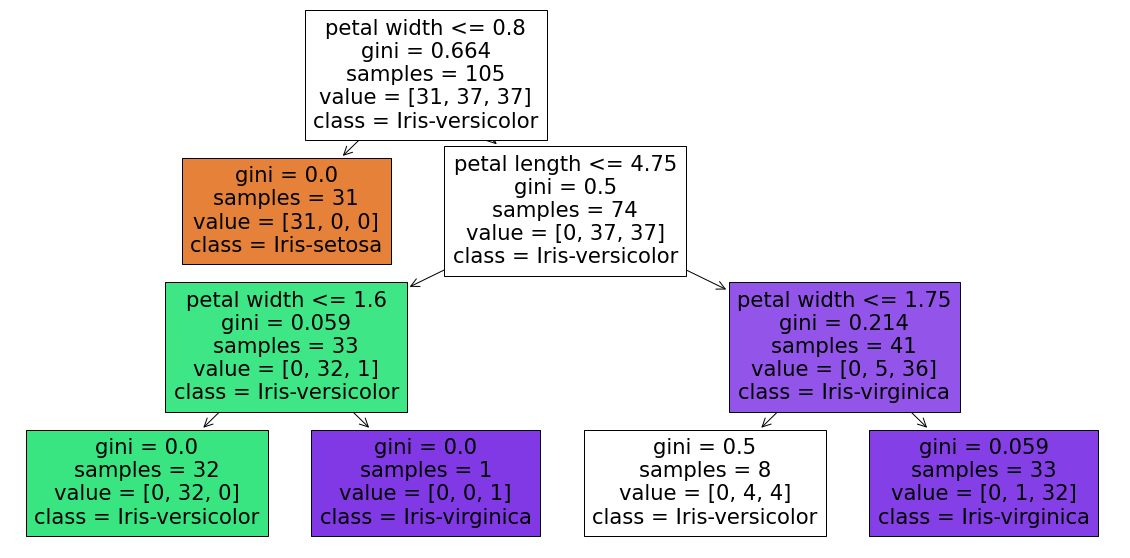

In [ ]:
pfig = plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True)
plt.show()

In [ ]:
model.predict_proba(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
37,0,0,0.000000
3,1,1,1.000000
5,0,0,0.000000
38,0,0,0.000000
4,1,1,0.500000
7,2,2,0.030303
18,1,1,1.000000
39,0,0,0.000000
13,0,0,0.000000
43,0,0,0.000000


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,19,0,0,19
1,0,13,0,13
2,0,0,13,13
All,19,13,13,45


In [ ]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] ) / cfm.loc['All','All'] 
acuracy

0.7111111111111111

In [ ]:
precision = (cfm.loc[1,1]) / cfm.loc['All',1] 
precision

1.0

# Random Forest Classifier
* https://en.wikipedia.org/wiki/Random_forest
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.predict_proba(X_test)

array([[0.   , 0.988, 0.012],
       [0.971, 0.029, 0.   ],
       [0.   , 0.014, 0.986],
       [0.   , 0.984, 0.016],
       [0.   , 0.862, 0.138],
       [0.994, 0.006, 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.073, 0.927],
       [0.   , 0.85 , 0.15 ],
       [0.001, 0.998, 0.001],
       [0.   , 0.07 , 0.93 ],
       [0.998, 0.002, 0.   ],
       [0.949, 0.051, 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.009, 0.88 , 0.111],
       [0.   , 0.   , 1.   ],
       [0.   , 0.999, 0.001],
       [0.   , 0.988, 0.012],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.119, 0.881],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.003, 0.997],
       [0.   , 0.025, 0.975],
       [0.   , 0.029, 0.971],
       [0.   , 0.001, 0.999],
       [0.998, 0.002, 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.971, 0.029, 0.   ],
       [0.005, 0.988, 0.007],
       [1.

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
38,0,0,0.000
13,0,0,0.000
19,2,2,0.000
18,1,1,0.988
9,1,1,0.998
42,1,1,0.985
44,0,0,0.002
41,1,1,0.910
33,0,0,0.000
17,1,1,0.999


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,19,0,0,19
1,0,13,0,13
2,0,0,13,13
All,19,13,13,45


In [ ]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] ) / cfm.loc['All','All'] 
acuracy

0.7111111111111111

In [ ]:
precision = (cfm.loc[1,1]) / cfm.loc['All',1] 
precision

1.0

In [ ]:
test_result['y_pred_prob']

0     0.988
1     0.029
2     0.014
3     0.984
4     0.862
5     0.006
6     1.000
7     0.073
8     0.850
9     0.998
10    0.070
11    0.002
12    0.051
13    0.000
14    0.000
15    0.880
16    0.000
17    0.999
18    0.988
19    0.000
20    0.000
21    0.119
22    0.000
23    0.000
24    0.003
25    0.025
26    0.029
27    0.001
28    0.002
29    0.000
30    0.000
31    0.029
32    0.988
33    0.000
34    0.000
35    0.081
36    0.971
37    0.000
38    0.000
39    0.000
40    0.032
41    0.910
42    0.985
43    0.002
44    0.002
Name: y_pred_prob, dtype: float64

In [ ]:
test_result['y_pred_prob'].value_counts(bins=10)

(-0.002, 0.1]    31
(0.9, 1.0]       10
(0.8, 0.9]        3
(0.1, 0.2]        1
(0.7, 0.8]        0
(0.6, 0.7]        0
(0.5, 0.6]        0
(0.4, 0.5]        0
(0.3, 0.4]        0
(0.2, 0.3]        0
Name: y_pred_prob, dtype: int64

In [ ]:
test_result['prob_bucket'] = pd.cut(test_result['y_pred_prob'], bins=10)
test_result['prob_bucket']

0        (0.9, 1.0]
1     (-0.001, 0.1]
2     (-0.001, 0.1]
3        (0.9, 1.0]
4        (0.8, 0.9]
5     (-0.001, 0.1]
6        (0.9, 1.0]
7     (-0.001, 0.1]
8        (0.8, 0.9]
9        (0.9, 1.0]
10    (-0.001, 0.1]
11    (-0.001, 0.1]
12    (-0.001, 0.1]
13    (-0.001, 0.1]
14    (-0.001, 0.1]
15       (0.8, 0.9]
16    (-0.001, 0.1]
17       (0.9, 1.0]
18       (0.9, 1.0]
19    (-0.001, 0.1]
20    (-0.001, 0.1]
21       (0.1, 0.2]
22    (-0.001, 0.1]
23    (-0.001, 0.1]
24    (-0.001, 0.1]
25    (-0.001, 0.1]
26    (-0.001, 0.1]
27    (-0.001, 0.1]
28    (-0.001, 0.1]
29    (-0.001, 0.1]
30    (-0.001, 0.1]
31    (-0.001, 0.1]
32       (0.9, 1.0]
33    (-0.001, 0.1]
34    (-0.001, 0.1]
35    (-0.001, 0.1]
36       (0.9, 1.0]
37    (-0.001, 0.1]
38    (-0.001, 0.1]
39    (-0.001, 0.1]
40    (-0.001, 0.1]
41       (0.9, 1.0]
42       (0.9, 1.0]
43    (-0.001, 0.1]
44    (-0.001, 0.1]
Name: prob_bucket, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.1] < (0.1, 0.2] <

In [ ]:
#labels = [1,2,3,4,5,6,7,8,9,10 ]
test_result['q_bucket'] = pd.qcut(test_result['y_pred_prob'], q=10, duplicates='drop')
test_result['q_bucket']

0       (0.922, 0.988]
1      (0.025, 0.0396]
2       (0.002, 0.025]
3       (0.922, 0.988]
4       (0.111, 0.922]
5       (0.002, 0.025]
6         (0.988, 1.0]
7      (0.0396, 0.111]
8       (0.111, 0.922]
9         (0.988, 1.0]
10     (0.0396, 0.111]
11     (0.0002, 0.002]
12     (0.0396, 0.111]
13    (-0.001, 0.0002]
14    (-0.001, 0.0002]
15      (0.111, 0.922]
16    (-0.001, 0.0002]
17        (0.988, 1.0]
18      (0.922, 0.988]
19    (-0.001, 0.0002]
20    (-0.001, 0.0002]
21      (0.111, 0.922]
22    (-0.001, 0.0002]
23    (-0.001, 0.0002]
24      (0.002, 0.025]
25      (0.002, 0.025]
26     (0.025, 0.0396]
27     (0.0002, 0.002]
28     (0.0002, 0.002]
29    (-0.001, 0.0002]
30    (-0.001, 0.0002]
31     (0.025, 0.0396]
32      (0.922, 0.988]
33    (-0.001, 0.0002]
34    (-0.001, 0.0002]
35     (0.0396, 0.111]
36      (0.922, 0.988]
37    (-0.001, 0.0002]
38    (-0.001, 0.0002]
39    (-0.001, 0.0002]
40     (0.025, 0.0396]
41      (0.111, 0.922]
42      (0.922, 0.988]
43     (0.0

In [ ]:
test_result

,y_act,y_pred,y_pred_prob,prob_bucket,q_bucket
0,1,1,0.988,"(0.9, 1.0]","(0.922, 0.988]"
1,0,0,0.029,"(-0.001, 0.1]","(0.025, 0.0396]"
2,2,2,0.014,"(-0.001, 0.1]","(0.002, 0.025]"
3,1,1,0.984,"(0.9, 1.0]","(0.922, 0.988]"
4,1,1,0.862,"(0.8, 0.9]","(0.111, 0.922]"
5,0,0,0.006,"(-0.001, 0.1]","(0.002, 0.025]"
6,1,1,1.000,"(0.9, 1.0]","(0.988, 1.0]"
7,2,2,0.073,"(-0.001, 0.1]","(0.0396, 0.111]"
8,1,1,0.850,"(0.8, 0.9]","(0.111, 0.922]"
9,1,1,0.998,"(0.9, 1.0]","(0.988, 1.0]"


In [ ]:
eval_table  = test_result.groupby(by='q_bucket').agg(
    count=pd.NamedAgg(column="q_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    mean_probability=pd.NamedAgg(column="y_pred_prob", aggfunc="sum"),
    ).reset_index()

eval_table

,q_bucket,count,response_count,min_probability,mean_probability
0,"(-0.001, 0.0002]",14,6,0.000,0.000
1,"(0.0002, 0.002]",5,2,0.001,0.009
2,"(0.002, 0.025]",4,6,0.003,0.048
3,"(0.025, 0.0396]",4,4,0.029,0.119
4,"(0.0396, 0.111]",4,6,0.051,0.275
5,"(0.111, 0.922]",5,6,0.119,3.621
6,"(0.922, 0.988]",6,6,0.971,5.904
7,"(0.988, 1.0]",3,3,0.998,2.997


In [ ]:
eval_table['precision'] = eval_table['response_count'] / eval_table['count'] 
eval_table

,q_bucket,count,response_count,min_probability,mean_probability,precision
0,"(-0.001, 0.0002]",14,6,0.000,0.000,0.428571
1,"(0.0002, 0.002]",5,2,0.001,0.009,0.400000
2,"(0.002, 0.025]",4,6,0.003,0.048,1.500000
3,"(0.025, 0.0396]",4,4,0.029,0.119,1.000000
4,"(0.0396, 0.111]",4,6,0.051,0.275,1.500000
5,"(0.111, 0.922]",5,6,0.119,3.621,1.200000
6,"(0.922, 0.988]",6,6,0.971,5.904,1.000000
7,"(0.988, 1.0]",3,3,0.998,2.997,1.000000


In [ ]:
eval_table['response_fraction'] = eval_table['response_count'] / eval_table['response_count'].sum()
eval_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
0,"(-0.001, 0.0002]",14,6,0.000,0.000,0.428571,0.153846
1,"(0.0002, 0.002]",5,2,0.001,0.009,0.400000,0.051282
2,"(0.002, 0.025]",4,6,0.003,0.048,1.500000,0.153846
3,"(0.025, 0.0396]",4,4,0.029,0.119,1.000000,0.102564
4,"(0.0396, 0.111]",4,6,0.051,0.275,1.500000,0.153846
5,"(0.111, 0.922]",5,6,0.119,3.621,1.200000,0.153846
6,"(0.922, 0.988]",6,6,0.971,5.904,1.000000,0.153846
7,"(0.988, 1.0]",3,3,0.998,2.997,1.000000,0.076923


In [ ]:

eval_table = eval_table.sort_index(ascending=False)
eval_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
7,"(0.379, 1.0]",1229,438,0.379567,662.711378,0.356387,0.242525
6,"(0.252, 0.379]",1225,334,0.252204,384.640068,0.272653,0.184939
5,"(0.174, 0.252]",1229,232,0.174190,254.845793,0.188771,0.128461
4,"(0.124, 0.174]",1223,231,0.123983,180.541472,0.188880,0.127907
3,"(0.0793, 0.124]",1257,156,0.079476,130.653597,0.124105,0.086379
2,"(0.0362, 0.0793]",1226,155,0.036213,72.708790,0.126427,0.085825
1,"(0.00845, 0.0362]",1241,126,0.008459,26.323858,0.101531,0.069767
0,"(-0.001, 0.00845]",3699,134,0.000000,2.761970,0.036226,0.074197


In [ ]:
eval_table['cumulative_response_count'] = eval_table['response_count'].cumsum()
eval_table['cumulative_count'] = eval_table['count'].cumsum()
eval_table = eval_table.sort_index(ascending=True)
eval_table


,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count
0,"(-0.001, 0.00845]",3699,134,0.000000,2.761970,0.036226,0.074197,1806,12329
1,"(0.00845, 0.0362]",1241,126,0.008459,26.323858,0.101531,0.069767,1672,8630
2,"(0.0362, 0.0793]",1226,155,0.036213,72.708790,0.126427,0.085825,1546,7389
3,"(0.0793, 0.124]",1257,156,0.079476,130.653597,0.124105,0.086379,1391,6163
4,"(0.124, 0.174]",1223,231,0.123983,180.541472,0.188880,0.127907,1235,4906
5,"(0.174, 0.252]",1229,232,0.174190,254.845793,0.188771,0.128461,1004,3683
6,"(0.252, 0.379]",1225,334,0.252204,384.640068,0.272653,0.184939,772,2454
7,"(0.379, 1.0]",1229,438,0.379567,662.711378,0.356387,0.242525,438,1229


In [ ]:
eval_table['cumulative_precision'] = eval_table['cumulative_response_count']/eval_table['cumulative_count']
eval_table['cumulative_response_fraction'] = eval_table['cumulative_response_count'] / eval_table['response_count'].sum()
eval_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count,cumulative_precision,cumulative_response_fraction
0,"(-0.001, 0.00845]",3699,134,0.000000,2.761970,0.036226,0.074197,1806,12329,0.146484,1.000000
1,"(0.00845, 0.0362]",1241,126,0.008459,26.323858,0.101531,0.069767,1672,8630,0.193743,0.925803
2,"(0.0362, 0.0793]",1226,155,0.036213,72.708790,0.126427,0.085825,1546,7389,0.209230,0.856035
3,"(0.0793, 0.124]",1257,156,0.079476,130.653597,0.124105,0.086379,1391,6163,0.225702,0.770210
4,"(0.124, 0.174]",1223,231,0.123983,180.541472,0.188880,0.127907,1235,4906,0.251733,0.683832
5,"(0.174, 0.252]",1229,232,0.174190,254.845793,0.188771,0.128461,1004,3683,0.272604,0.555925
6,"(0.252, 0.379]",1225,334,0.252204,384.640068,0.272653,0.184939,772,2454,0.314588,0.427464
7,"(0.379, 1.0]",1229,438,0.379567,662.711378,0.356387,0.242525,438,1229,0.356387,0.242525


#  Receiver operating characteristic (ROC)

ROC AUC Score = 0.7261924494034004


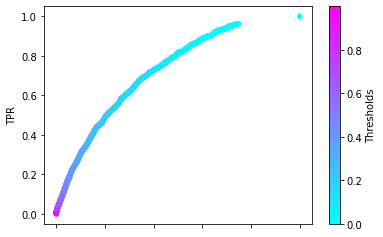

In [ ]:
cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)
roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

print(F"ROC AUC Score = {roc_auc}")

# Precision Recall Curve (PRC)

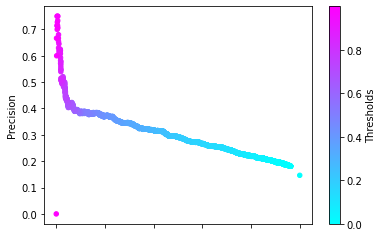

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)

# Support Vector Machines
* https://en.wikipedia.org/wiki/Support-vector_machine
* https://scikit-learn.org/stable/modules/svm.html

In [ ]:
model = svm.SVC(kernel='linear', C=1.0, probability=True)

model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
11,0,0,0.037836
13,0,0,0.040455
3,1,1,0.897620
14,0,0,0.024572
37,0,0,0.031125
35,2,2,0.090346
22,0,0,0.048332
18,1,1,0.905286
42,1,1,0.937171
1,0,0,0.039553


ROC AUC Score = 0.6675429573715499


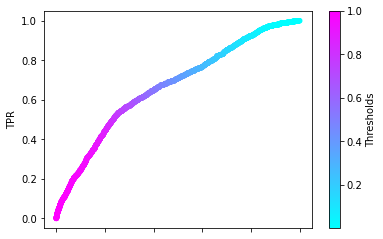

In [ ]:
cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)
roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

print(F"ROC AUC Score = {roc_auc}")

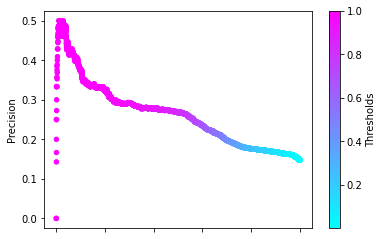

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)

<hr>
Last update 2021-10-16 by Sumudu Tennakoon